<a href="https://colab.research.google.com/github/Coeze/qrCodeGenerator/blob/main/Bin_classification_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
 num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
# one hot encode images

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for idx, sequence in enumerate(sequences):
    for j in sequence:
      results[idx, j] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5445 - accuracy: 0.7645 - val_loss: 0.4133 - val_accuracy: 0.8650
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3373 - accuracy: 0.8906 - val_loss: 0.3201 - val_accuracy: 0.8825
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2495 - accuracy: 0.9163 - val_loss: 0.2901 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2010 - accuracy: 0.9325 - val_loss: 0.2766 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1667 - accuracy: 0.9450 - val_loss: 0.2983 - val_accuracy: 0.8813
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1428 - accuracy: 0.9543 - val_loss: 0.2856 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1209 - accuracy: 0.9644 - val_loss: 0.3252 - val_accuracy: 0.8761
Epoch 8/20
30

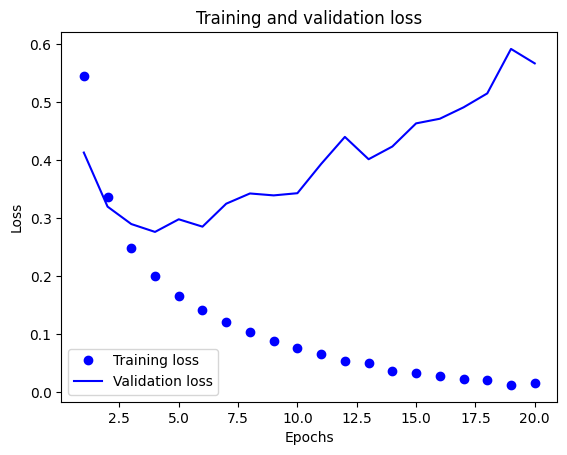

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

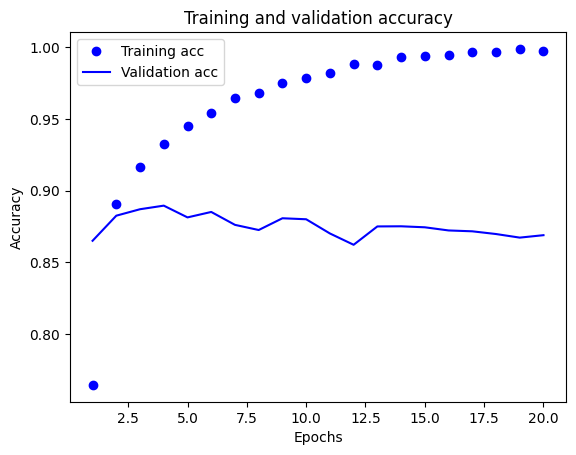

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# retraining model after validation
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.4686 - accuracy: 0.8035
Epoch 2/4
49/49 [==============================] - 2s 48ms/step - loss: 0.2695 - accuracy: 0.9018
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2116 - accuracy: 0.9239
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3090 - accuracy: 0.8764


In [ ]:
print(results)

[0.3090401291847229, 0.8763999938964844]
